In [4]:
import pandas as pd
from google.colab import files
uploaded = files.upload()


Saving Copy of 50_Startups.csv to Copy of 50_Startups.csv


In [5]:
dataset=pd.read_csv("Copy of 50_Startups.csv")
print (dataset)

    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       

In [6]:
dataset=pd.get_dummies(dataset,drop_first=True)
print (dataset)

    R&D Spend  Administration  Marketing Spend     Profit  State_Florida  \
0   165349.20       136897.80        471784.10  192261.83          False   
1   162597.70       151377.59        443898.53  191792.06          False   
2   153441.51       101145.55        407934.54  191050.39           True   
3   144372.41       118671.85        383199.62  182901.99          False   
4   142107.34        91391.77        366168.42  166187.94           True   
5   131876.90        99814.71        362861.36  156991.12          False   
6   134615.46       147198.87        127716.82  156122.51          False   
7   130298.13       145530.06        323876.68  155752.60           True   
8   120542.52       148718.95        311613.29  152211.77          False   
9   123334.88       108679.17        304981.62  149759.96          False   
10  101913.08       110594.11        229160.95  146121.95           True   
11  100671.96        91790.61        249744.55  144259.40          False   
12   93863.7

In [7]:
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_Florida', 'State_New York'],
      dtype='object')

In [8]:
independent=dataset[['R&D Spend', 'Administration', 'Marketing Spend','State_Florida', 'State_New York']]
print (independent)
dependent=dataset[['Profit']]
print (dependent)

    R&D Spend  Administration  Marketing Spend  State_Florida  State_New York
0   165349.20       136897.80        471784.10          False            True
1   162597.70       151377.59        443898.53          False           False
2   153441.51       101145.55        407934.54           True           False
3   144372.41       118671.85        383199.62          False            True
4   142107.34        91391.77        366168.42           True           False
5   131876.90        99814.71        362861.36          False            True
6   134615.46       147198.87        127716.82          False           False
7   130298.13       145530.06        323876.68           True           False
8   120542.52       148718.95        311613.29          False            True
9   123334.88       108679.17        304981.62          False           False
10  101913.08       110594.11        229160.95           True           False
11  100671.96        91790.61        249744.55          False   

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0)
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='poisson', splitter='random')
regressor.fit(x_train,y_train)

DecisionTreeRegressor(criterion='poisson', splitter='random')

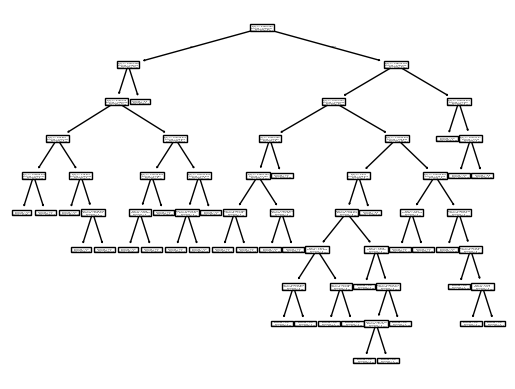

In [37]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [38]:
y_pred=regressor.predict(x_test)
y_pred

array([101004.64, 134307.35, 141585.52,  78239.91, 182901.99, 108733.99,
        90708.19,  99937.59, 108733.99, 182901.99,  99937.59,  89949.14,
       141585.52,  89949.14, 141585.52])

In [39]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)
r_score

0.843438683330491

In [ ]:
import pickle
filename="finalized_model_Multiplelinear.sav"
pickle.dump(regressor,open(filename,'wb'))
loaded_model=pickle.load(open("finalized_model_Multiplelinear.sav",'rb'))
result=loaded_model.predict([[944069,51283.14,197029.42,0,1]])
result


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[796975.86573729]])